# Home credit default risk project
### by Rubi May

In [54]:
#importar las librerías
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import polars as pl

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
%matplotlib inline
import datetime as dt

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import Imputer
import os
import seaborn as sns



In [55]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [56]:
#Load all csv files 
#note: making a comparision of libraries, polars compute time is 5times faster than pandas

#application_test = pl.read_csv('C:/Users/rubib/Documents/03_CODE SKILLS/SKILLS/Proyecto final/home-credit-default-risk/application_test.csv')
#application_train = pl.read_csv('C:/Users/rubib/Documents/03_CODE SKILLS/SKILLS/Proyecto final/home-credit-default-risk/application_train.csv')
#bureau_balance = pl.read_csv('C:/Users/rubib/Documents/03_CODE SKILLS/SKILLS/Proyecto final/home-credit-default-risk/bureau_balance.csv')
#bureau = pl.read_csv('C:/Users/rubib/Documents/03_CODE SKILLS/SKILLS/Proyecto final/home-credit-default-risk/bureau.csv')
#credit_card_balance = pl.read_csv('C:/Users/rubib/Documents/03_CODE SKILLS/SKILLS/Proyecto final/home-credit-default-risk/credit_card_balance.csv')
#installments_payments = pl.read_csv('C:/Users/rubib/Documents/03_CODE SKILLS/SKILLS/Proyecto final/home-credit-default-risk/installments_payments.csv')
#posh_cash_balance = pl.read_csv('C:/Users/rubib/Documents/03_CODE SKILLS/SKILLS/Proyecto final/home-credit-default-risk/POS_CASH_balance.csv')
#previous_application = pl.read_csv('C:/Users/rubib/Documents/03_CODE SKILLS/SKILLS/Proyecto final/home-credit-default-risk/previous_application.csv')
#sample_submission = pl.read_csv('C:/Users/rubib/Documents/03_CODE SKILLS/SKILLS/Proyecto final/home-credit-default-risk/sample_submission.csv')


In [57]:
directory='C:/Users/rubib/Documents/03_CODE SKILLS/SKILLS/Proyecto final/home-credit-default-risk/'
application_test = pd.read_csv(directory+'application_test.csv')
application_train = pd.read_csv(directory+'application_train.csv')
bureau_balance = pd.read_csv(directory+'bureau_balance.csv')
bureau = pd.read_csv(directory+'bureau.csv')
credit_card_balance = pd.read_csv(directory+'credit_card_balance.csv')
installments_payments = pd.read_csv(directory+'installments_payments.csv')
posh_cash_balance = pd.read_csv(directory+'POS_CASH_balance.csv')
previous_application = pd.read_csv(directory+'Cprevious_application.csv')
#sample_submission = pd.read_csv('C:/Users/rubib/Documents/03_CODE SKILLS/SKILLS/Proyecto final/home-credit-default-risk/sample_submission.csv')


In [58]:
#this will be the main file : application_train , the shape of the file is:  
application_train.shape

(307511, 122)

In [59]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00


In [60]:
#shape of the test file
application_test.shape

(48744, 121)

# 01_EDA - Exploratory Data Analisys

In [61]:
#How many values of each target type exists
application_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

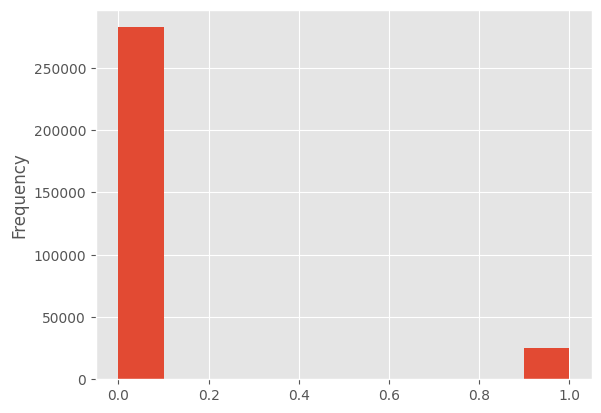

In [62]:
#plotting the count of values we can see that is an imbalanced class problem. 
#We will need to weight the classes by their representation in the data to represent this imbalance
application_train['TARGET'].astype(int).plot.hist()

In [63]:
#Missing values calculation

def missing_values_table(df):
    
    missing_val= df.isnull().sum() #Total
    missing_val_percentage= 100 * missing_val / len(df)
    mv_table= pd.concat([missing_val,missing_val_percentage],axis=1)
    mv_table= mv_table.rename(columns={0:"Missing values", 1: 'percentage of total value'})
    mv_table=mv_table.sort_values(by="Missing values",ascending=False).round(2)
    mv_table=mv_table[mv_table["Missing values"]!=0]

    print("Of the total of ",df.shape[1],"columns, ",mv_table.shape[0]," columns have missing values")
    return mv_table


In [64]:
train_missing_values=missing_values_table(application_train)
print(train_missing_values)

#there are a lot of colums witjh ,missing values. It will be later analyzed the best way of handle this data

Of the total of  122 columns,  67  columns have missing values
                          Missing values  percentage of total value
COMMONAREA_MEDI                   214865                      69.87
COMMONAREA_AVG                    214865                      69.87
COMMONAREA_MODE                   214865                      69.87
NONLIVINGAPARTMENTS_MODE          213514                      69.43
NONLIVINGAPARTMENTS_AVG           213514                      69.43
...                                  ...                        ...
EXT_SOURCE_2                         660                       0.21
AMT_GOODS_PRICE                      278                       0.09
AMT_ANNUITY                           12                       0.00
CNT_FAM_MEMBERS                        2                       0.00
DAYS_LAST_PHONE_CHANGE                 1                       0.00

[67 rows x 2 columns]


In [65]:
#Column types of train test file (from the 122 values)
print(application_train.dtypes.value_counts())

#NUmber of unique classes in each OBJECT column
print()
print("n Object types unique classes")
application_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)
#Note: Most of the categorical variables have a relatively small number of unique entries in this case

float64    65
int64      41
object     16
Name: count, dtype: int64

n Object types unique classes


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Encoding Categorical Variables

A machine learning model can't deal with categorical variables so we have to encode (represent) these variables as numbers before handing them off to the model. 

we will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for  any categorical variables with more than 2 categories. 

#### - One-hot encoding:  to convert categories into numbers one hot encoding does this conversion by creating new columns for each category and assigning a 1 or 0 to indicate the presence or absence of that category. This encoding is particularly useful when dealing with nominal data 

#### - label encoding: Unlike one hot encoding, label encoding does not create new columns for each category. Instead, it replaces each category with a corresponding numerical label. For example, if we have the categories "red," "blue," and "green," label encoding may assign them labels like 0, 1, and 2, respectively. Label encoding is used in machine learning when dealing with ordinal data, where there is a specific order or hierarchy among the categories.

In [66]:
#Label encoder for categorical variables with 2 categories max

le = LabelEncoder()
le_count=0

#iterate through the columns

for col in application_train:
    if application_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(application_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(application_train[col])
            # Transform both training and testing data
            application_train[col] = le.transform(application_train[col])
            application_test[col] = le.transform(application_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [67]:
#One hot encoding

#La función get_dummies de pandas
#Básicamente lo que hará la función es crear una columna por cada valor diferente de cada celda, 
#separándolos por el caracter que nosotros especifiquemos, y rellenar dicha columna con ceros y unos.

app_train = pd.get_dummies(application_train)
app_test = pd.get_dummies(application_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)



Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [68]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,0,1,0,202500.00,406597.50,24700.50,351000.00,...,False,False,False,False,False,False,True,False,True,False
1,100003,0,0,0,0,0,270000.00,1293502.50,35698.50,1129500.00,...,False,True,False,False,False,False,False,False,True,False
2,100004,0,1,1,1,0,67500.00,135000.00,6750.00,135000.00,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,0,1,0,135000.00,312682.50,29686.50,297000.00,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,0,1,0,121500.00,513000.00,21865.50,513000.00,...,False,False,False,False,False,False,False,False,False,False


In [69]:
# Aligning Training and testing data

# There need to be the same features (columns) in both the training and testing data. 
# One-hot encoding has created more columns in the training data because there were some categorical variables with 
# categories not represented in the testing data. 
# To remove the columns in the training data that are not in the testing data, we need to align the dataframes. 

train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)


Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


### Anomalies

#### Clients age

In [70]:
#Client's age in days at the time of application
#time only relative to the application

(app_train['DAYS_BIRTH'] / -365).describe()

count   307511.00
mean        43.94
std         11.96
min         20.52
25%         34.01
50%         43.15
75%         53.92
max         69.12
Name: DAYS_BIRTH, dtype: float64

#### Days employed 

In [71]:
(app_train['DAYS_EMPLOYED']).describe()

count   307511.00
mean     63815.05
std     141275.77
min     -17912.00
25%      -2760.00
50%      -1213.00
75%       -289.00
max     365243.00
Name: DAYS_EMPLOYED, dtype: float64

In [72]:
(app_train['DAYS_EMPLOYED']/365).describe()

count   307511.00
mean       174.84
std        387.06
min        -49.07
25%         -7.56
50%         -3.32
75%         -0.79
max       1000.67
Name: DAYS_EMPLOYED, dtype: float64

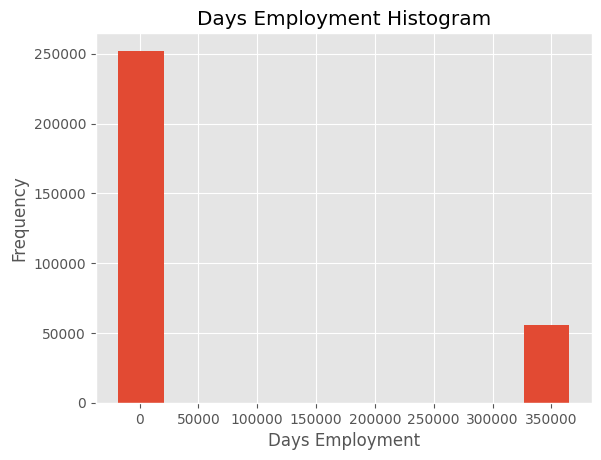

In [73]:
#Previous data is incorrect
app_train['DAYS_EMPLOYED'].plot.hist(title= 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [74]:
anom= app_train[app_train['DAYS_EMPLOYED']== 365243]
non_anom= app_train[app_train['DAYS_EMPLOYED']!= 365243]

print('The non-anomalies represent the %0.2f%% of loans that are failed' % ( 100*non_anom['TARGET'].mean()))
print('The anomalies represent the %0.2f%% of loans that are failed' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies represent the 8.66% of loans that are failed
The anomalies represent the 5.40% of loans that are failed
There are 55374 anomalous days of employment


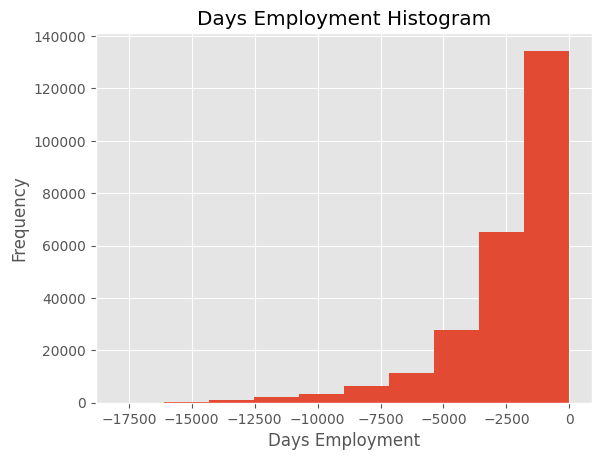

In [75]:
#we will fill in the anomalous values with not a number (np.nan) and then create 
#a new boolean column indicating whether or not the value was anomalous.

#Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED']==365243

#Replacing the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');


In [76]:
#doing the same for the test data

#Create an anomalous flag column
#app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED']==365243

#Replacing the anomalous values with nan
#app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


## Correlations

Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”

.20-.39 “weak”

.40-.59 “moderate”

.60-.79 “strong”

.80-1.0 “very strong”

In [77]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                            0.04
FLAG_DOCUMENT_3                                     0.04
REG_CITY_NOT_LIVE_CITY                              0.04
FLAG_EMP_PHONE                                      0.05
NAME_EDUCATION_TYPE_Secondary / secondary special   0.05
REG_CITY_NOT_WORK_CITY                              0.05
DAYS_ID_PUBLISH                                     0.05
CODE_GENDER_M                                       0.05
DAYS_LAST_PHONE_CHANGE                              0.06
NAME_INCOME_TYPE_Working                            0.06
REGION_RATING_CLIENT                                0.06
REGION_RATING_CLIENT_W_CITY                         0.06
DAYS_EMPLOYED                                       0.07
DAYS_BIRTH                                          0.08
TARGET                                              1.00
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                           -0.18
EXT_SOURCE_2

### Effect of Age on repayment

In [78]:
#changing the birthdays to positive value
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

'''As the client gets older, there is a negative linear relationship 
with the target meaning that as clients get older, they tend to repay their loans on time more often.'''

'As the client gets older, there is a negative linear relationship \nwith the target meaning that as clients get older, they tend to repay their loans on time more often.'

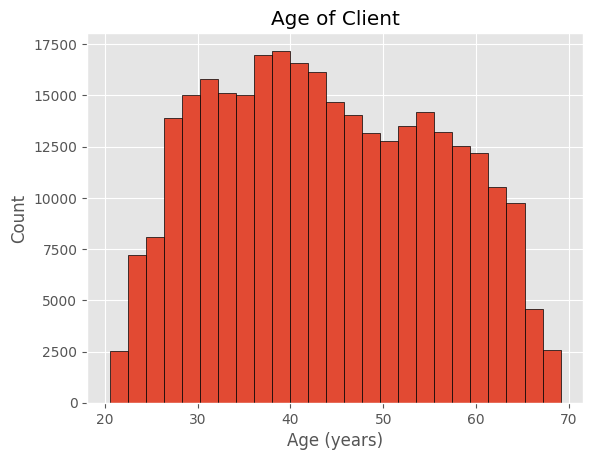

In [79]:
#plotting the count of age of client
# Set the style of plots
plt.style.use('ggplot')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

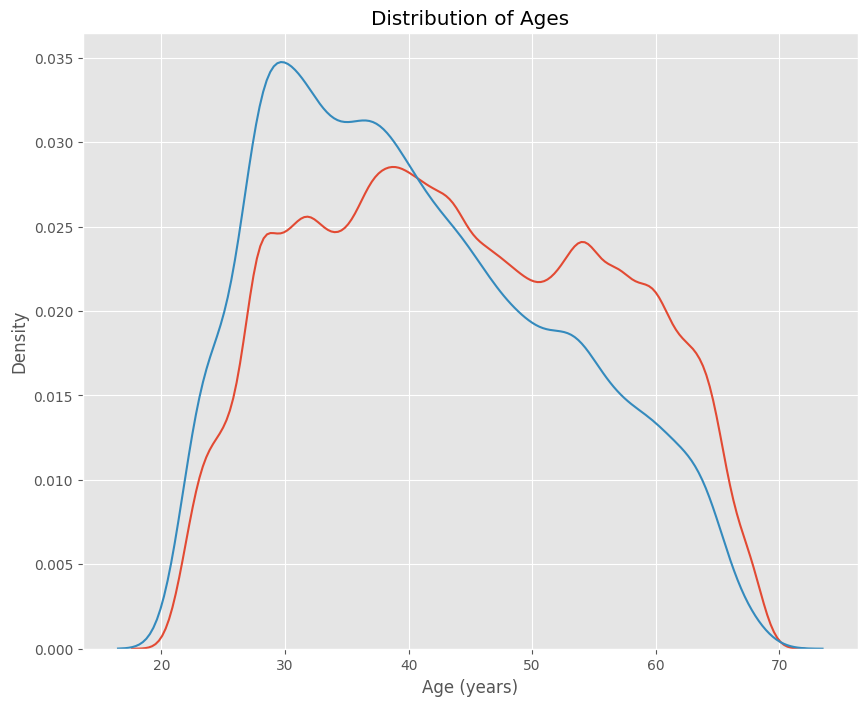

In [80]:
'''To visualize the effect of the age on the target, we will next make a 
kernel density estimation plot (KDE) colored by the value of the target. '''

#using the seaborn kdeplot for this graph.

plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
#plt.style.use('fivethirtyeight')
plt.xlabel('Age (years)'); 
plt.ylabel('Density'); 
plt.title('Distribution of Ages');



In [81]:
'''average failure to repay loans by age bracket.'''

# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)



,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.92,"(25.0, 30.0]"
1,0,16765,45.93,"(45.0, 50.0]"
2,0,19046,52.18,"(50.0, 55.0]"
3,0,19005,52.07,"(50.0, 55.0]"
4,0,19932,54.61,"(50.0, 55.0]"
5,0,16941,46.41,"(45.0, 50.0]"
6,0,13778,37.75,"(35.0, 40.0]"
7,0,18850,51.64,"(50.0, 55.0]"
8,0,20099,55.07,"(55.0, 60.0]"
9,0,14469,39.64,"(35.0, 40.0]"


In [82]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.12,8532.80,23.38
"(25.0, 30.0]",0.11,10155.22,27.82
"(30.0, 35.0]",0.10,11854.85,32.48
"(35.0, 40.0]",0.09,13707.91,37.56
"(40.0, 45.0]",0.08,15497.66,42.46
"(45.0, 50.0]",0.07,17323.90,47.46
"(50.0, 55.0]",0.07,19196.49,52.59
"(55.0, 60.0]",0.06,20984.26,57.49
"(60.0, 65.0]",0.05,22780.55,62.41


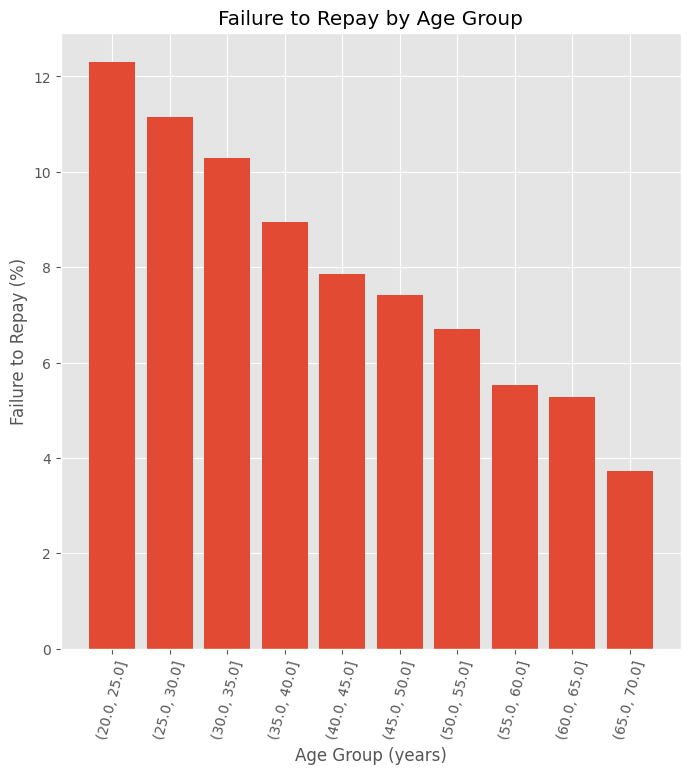

In [83]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

#younger applicants are more likely to not repay the loan

#### The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

### exterior sources

In [84]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.00,-0.16,-0.16,-0.18,-0.08
EXT_SOURCE_1,-0.16,1.00,0.21,0.19,0.60
EXT_SOURCE_2,-0.16,0.21,1.00,0.11,0.09
EXT_SOURCE_3,-0.18,0.19,0.11,1.00,0.21
DAYS_BIRTH,-0.08,0.60,0.09,0.21,1.00


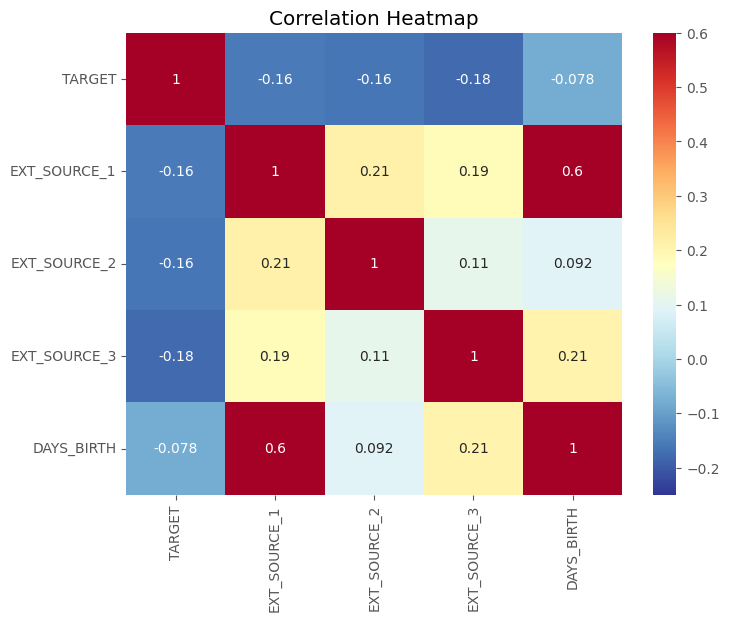

In [85]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

#### EXT_SOURCE featureshave negative correlations with the target: as the value of the EXT_SOURCE increases, the client is more likely to repay the loan.

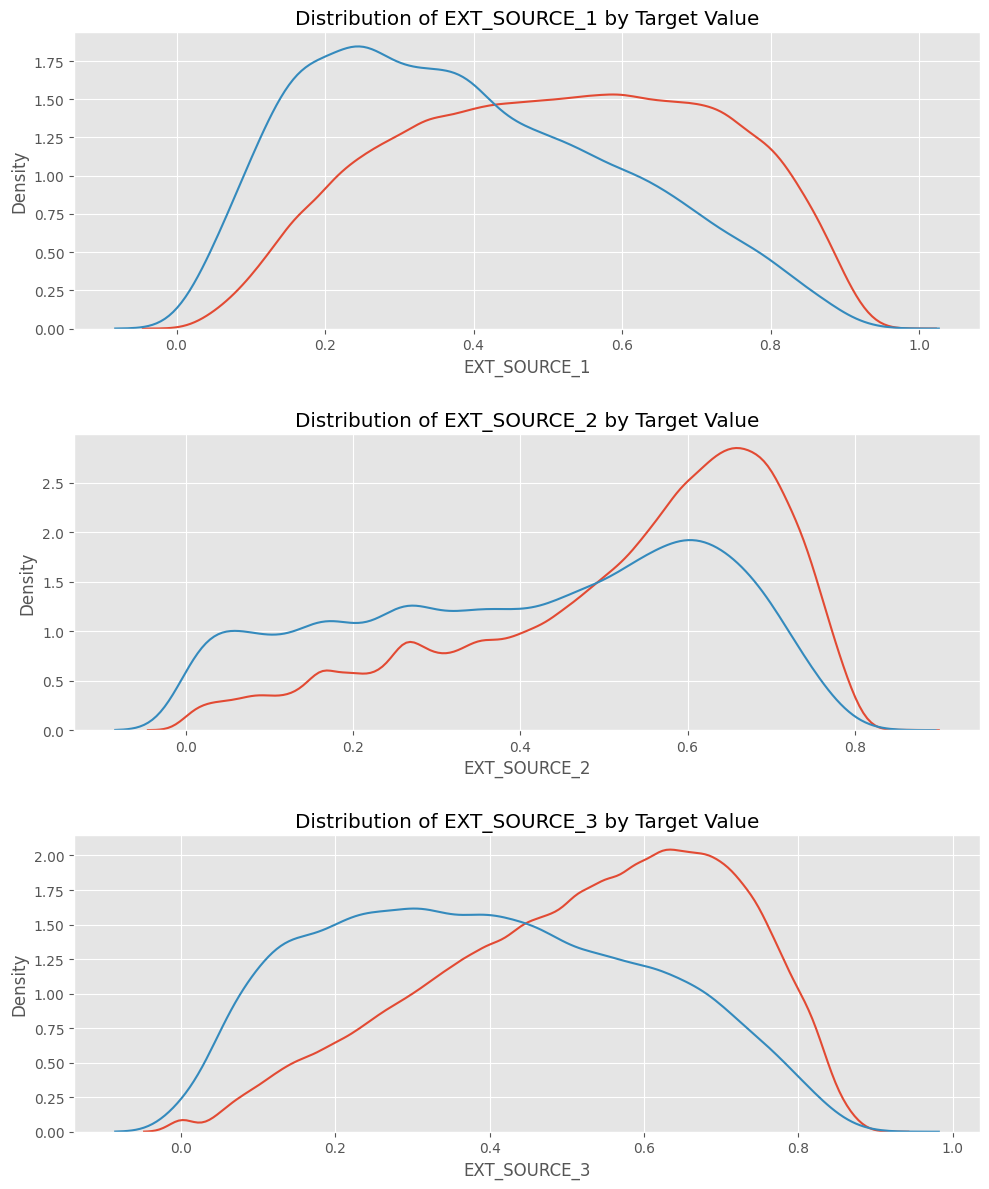

In [86]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

### PAIRS PLOT

it lets us see relationships between multiple pairs of variables as well as distributions of single variables. 

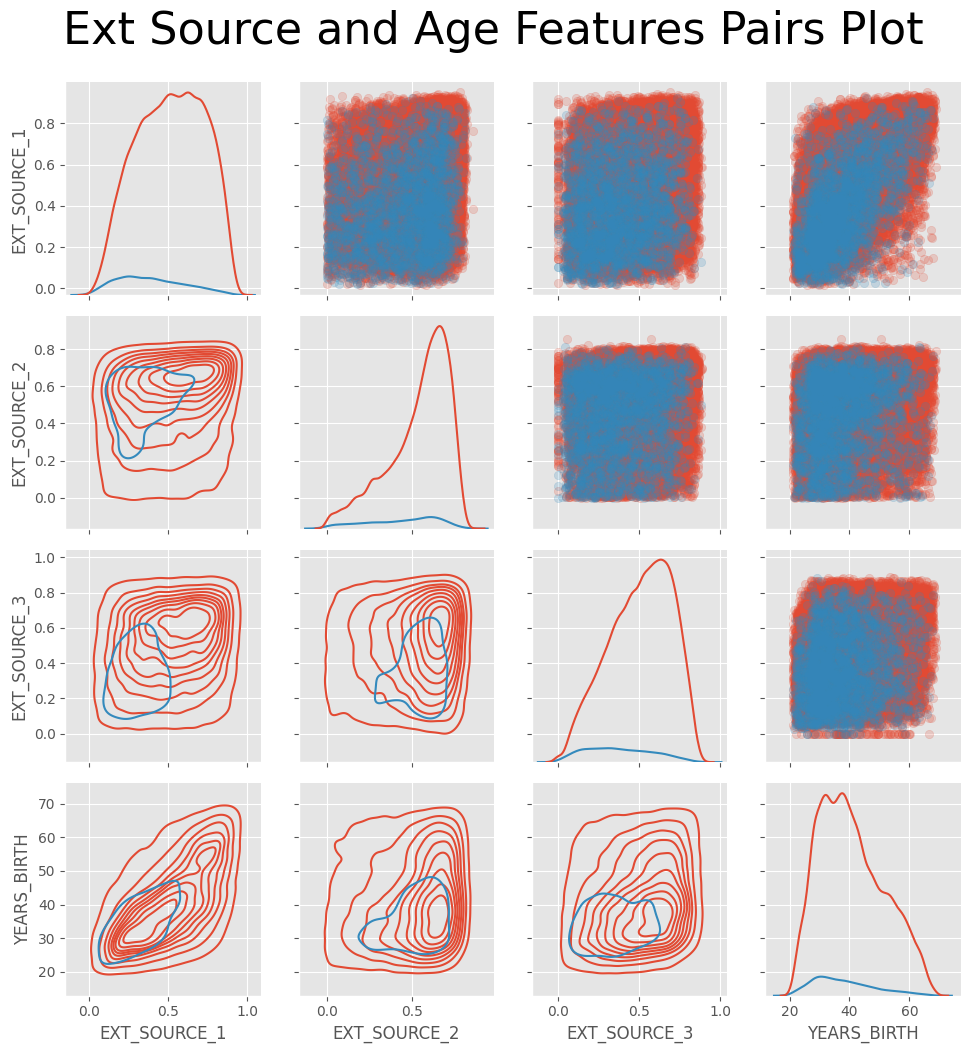

In [87]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

## Feature Engineering

### Polynomial Features

In [88]:
#New dataframe for polynomial features

poly_features = app_train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','TARGET']]

poly_features_test= app_test[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]

#Imputer for handling missing values
#from sklearn.preprocessing import Imputer    #deprecated
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy= 'median')
poly_target=poly_features['TARGET']

poly_features=poly_features.drop(columns=['TARGET'])

#Need to impute missing values
poly_features= imputer.fit_transform(poly_features)
poly_features_test= imputer.fit_transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

#Create the polynomial object with specified degree
poly_transformer= PolynomialFeatures(degree = 3)



In [89]:
#Training the polynomial features
poly_transformer.fit(poly_features)

#Transform the features
poly_features= poly_transformer.transform(poly_features)
poly_features_test= poly_transformer.transform(poly_features_test)

print('Polynomial Features shape: ', poly_features.shape)



Polynomial Features shape:  (307511, 35)


In [90]:
#it creates a considerable number of new features. Getting the names of this features:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

In [91]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

#Most negative and most positive correlation
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.19
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.19
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.18
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.18
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.17
EXT_SOURCE_1 EXT_SOURCE_2                -0.17
EXT_SOURCE_1 EXT_SOURCE_3                -0.16
EXT_SOURCE_2                             -0.16
EXT_SOURCE_2 DAYS_BIRTH                  -0.16
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.16
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.08
DAYS_BIRTH^2   -0.08
DAYS_BIRTH^3   -0.07
TARGET          1.00
1                NaN
Name: TARGET, dtype: float64


In [92]:
#to evaluate if this new features affect the machine learning model

#put the test features into dataframe
poly_features_test= pd.DataFrame(poly_features_test,columns=poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')


# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)


Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


### Domain Knowledge Features

- CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
- DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [93]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [94]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

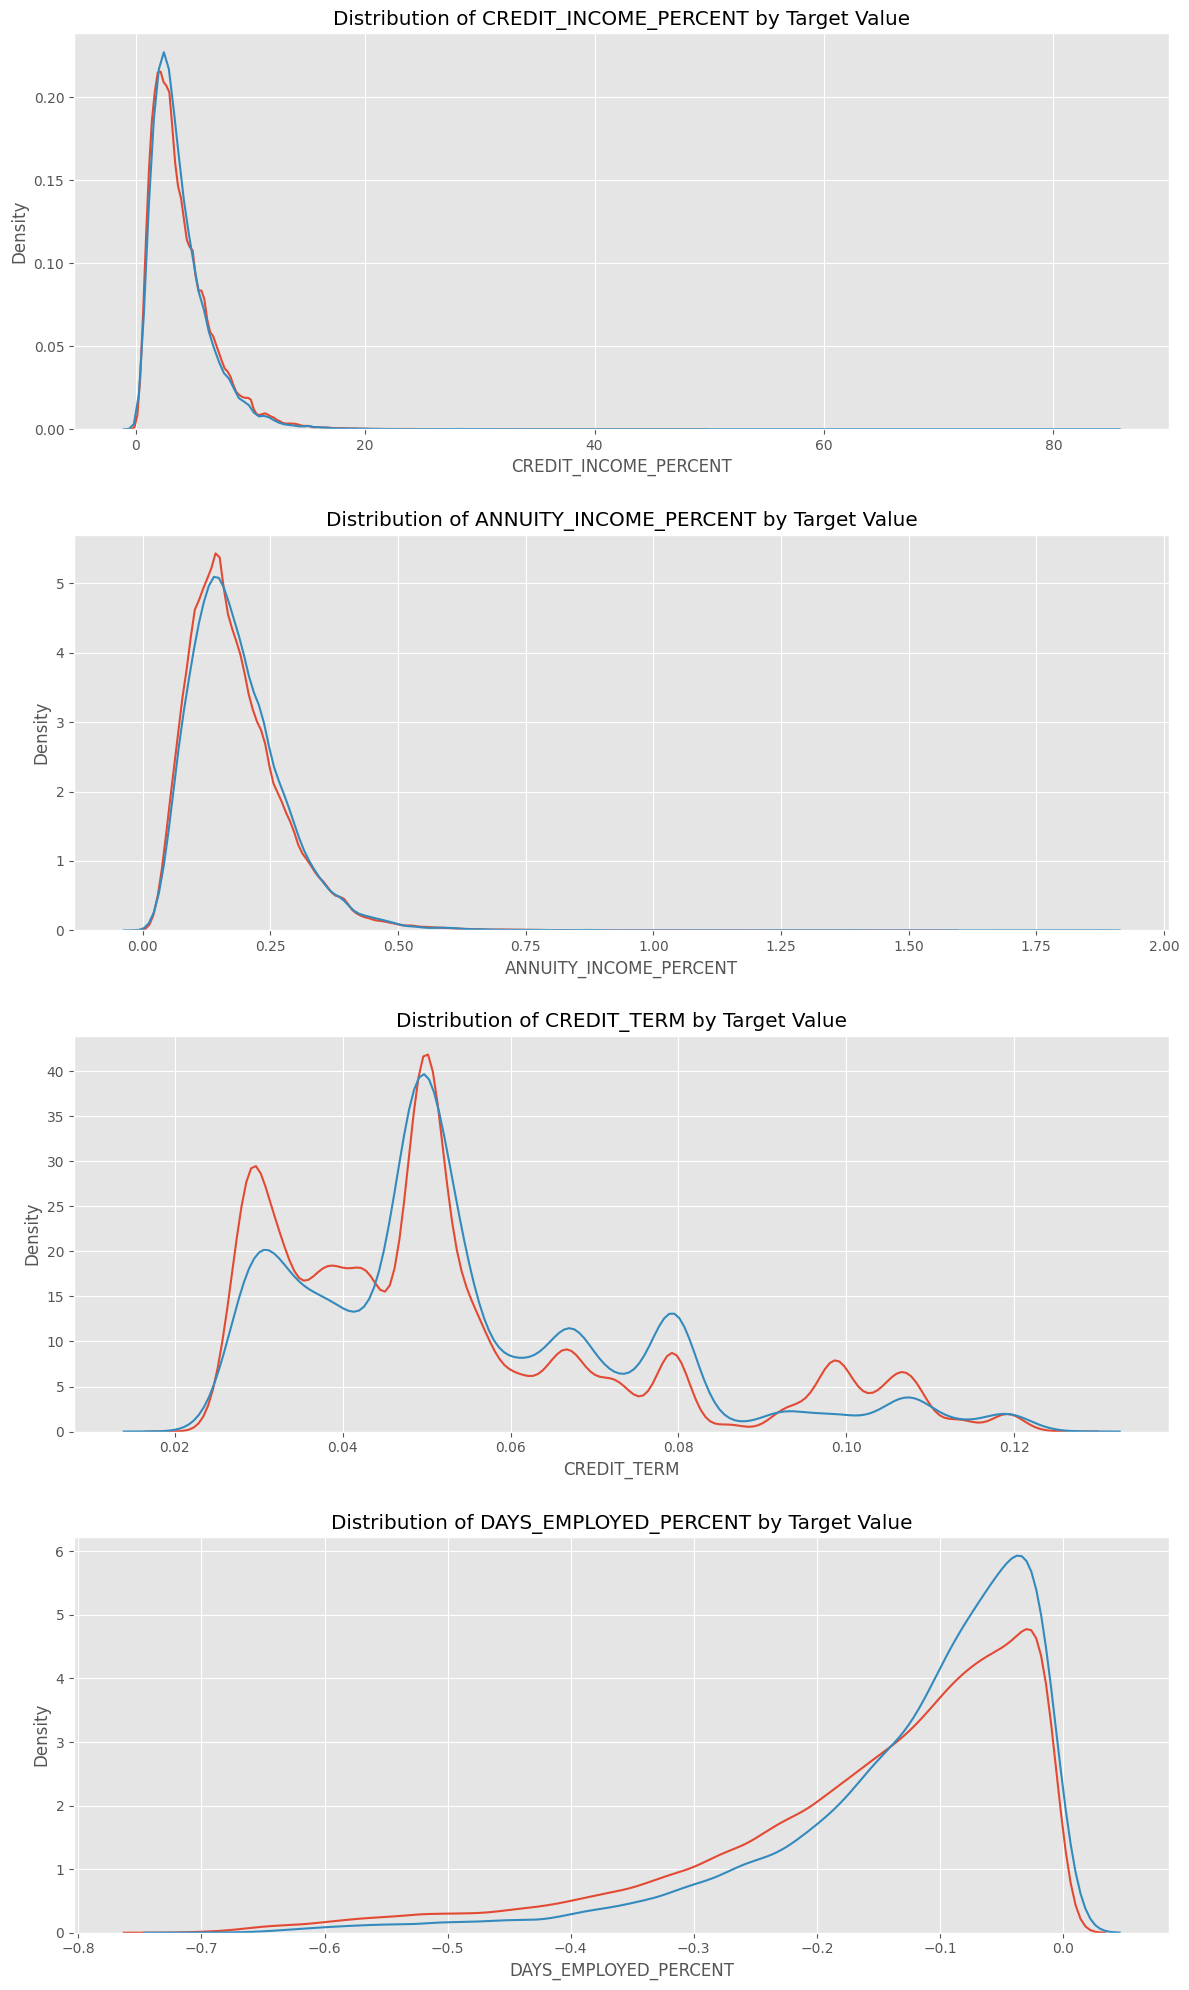

In [95]:
# KDE plot of domain knowledge variables

plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

## BASELINE

### Logistic Regression Implementation

In [96]:
from sklearn.preprocessing import MinMaxScaler

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


In [97]:
'''first create the model, then we train the model using .fit and then we make predictions on the testing data using .predict_proba 
#(remember that we want probabilities and not a 0 or 1).

'''

from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

In [98]:
print(train_labels)

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64


In [99]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [100]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.08
1,100005,0.14
2,100013,0.08
3,100028,0.08
4,100038,0.13


The predictions represent a probability between 0 and 1 that the loan will not be repaid.

In [51]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

In [101]:
from sklearn.ensemble import RandomForestClassifier

random_forest= RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)
random_forest.fit(train, train_labels)

# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   46.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   43.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


In [102]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

In [103]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

gbc= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(train, train_labels)
predictions_gbc= gbc.predict_proba(test)[:, 1]

# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions_gbc

# Save the submission dataframe
submit.to_csv('gbc_baseline.csv', index = False)



## This code is for lazy predict to use various models

In [203]:
#Trying lazy predict
X=train
y=train_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


In [204]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
#train, train_labels

100%|██████████| 29/29 [23:30:44<00:00, 2918.79s/it]    


In [206]:
print(models)

                        Accuracy  Balanced Accuracy  ROC AUC  F1 Score   
Model                                                                    
BernoulliNB                 0.73               0.61     0.61      0.79  \
DecisionTreeClassifier      0.85               0.54     0.54      0.86   
ExtraTreeClassifier         0.85               0.53     0.53      0.86   
XGBClassifier               0.92               0.52     0.52      0.89   
GaussianNB                  0.14               0.51     0.51      0.12   
BaggingClassifier           0.92               0.51     0.51      0.88   
AdaBoostClassifier          0.92               0.51     0.51      0.88   
LGBMClassifier              0.92               0.51     0.51      0.88   
LogisticRegression          0.92               0.51     0.51      0.88   
KNeighborsClassifier        0.91               0.51     0.51      0.88   
CalibratedClassifierCV      0.92               0.50     0.50      0.88   
ExtraTreesClassifier        0.92      